In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
import sqlite3

In [2]:
df = pd.read_csv("shein_footwear_clean.csv")


In [3]:
df.head(10)

,name,link,price_usd,mark_price_usd,star_rating,colour,seller_name,review_count,sku_id,hero_image
0,"Women's Casual Sports Shoes, Fashionable Versa...",https://us.shein.com/Women-s-Casual-Sports-Sho...,19.40,24.40,4.83,Khaki,Womens Shoes,77,sx2305270713671620,//img.ltwebstatic.com/images3_spmp/2023/12/19/...
1,2024 New Spring/Autumn Women Breathable Mesh H...,https://us.shein.com/2024-New-Spring-Autumn-Wo...,14.90,18.80,0.00,NaN,Limeiya Factory,0,sx2404088145930048,//img.ltwebstatic.com/images3_pi/2024/04/17/55...
2,Women's Casual Slip-on Flat Skate Shoes With A...,https://us.shein.com/Women-s-Casual-Slip-on-Fl...,7.50,18.80,4.92,NaN,Dawanfu,66,sx2309025401152825,//img.ltwebstatic.com/images3_pi/2023/09/04/a0...
3,"Women Mesh Breathable Casual Shoes, Soft Non-S...",https://us.shein.com/Women-Mesh-Breathable-Cas...,12.06,21.30,0.00,Purple,NaN,41,sx2308191847675463,//img.ltwebstatic.com/images3_spmp/2023/08/19/...
4,Women's Fashionable Casual Sneakers,https://us.shein.com/Women-s-Fashionable-Casua...,13.53,17.05,0.00,Grey,NaN,100+,sx2307234044444164,//img.ltwebstatic.com/images3_spmp/2023/12/31/...
5,"Sporty Chunky Sneakers For Women, Letter Graph...",https://us.shein.com/Sporty-Chunky-Sneakers-Fo...,21.30,26.90,0.00,White,NaN,500+,sx2211274466519128,//img.ltwebstatic.com/images3_pi/2023/04/07/16...
6,Summer Women Casual Sports Shoes Slip-On Hollo...,https://us.shein.com/Summer-Women-Casual-Sport...,14.90,14.90,0.00,Beige,NaN,0,st2404138888746786,//img.ltwebstatic.com/images3_spmp/2024/04/13/...
7,Comfortable Thick-Soled One Foot Slip-On Rocki...,https://us.shein.com/Comfortable-Thick-Soled-O...,16.90,21.20,0.00,Khaki,NaN,500+,sx2310298141659915,//img.ltwebstatic.com/images3_pi/2024/04/16/1a...
8,New Spring Fashionable Casual Sports Style Thi...,https://us.shein.com/New-Spring-Fashionable-Ca...,22.90,28.80,0.00,Beige,NaN,15,sx2401318579349193,//img.ltwebstatic.com/images3_spmp/2024/01/31/...
9,"Women Lace Up Casual Shoes, Sporty Outdoor Can...",https://us.shein.com/Women-Lace-Up-Casual-Shoe...,13.00,16.30,0.00,NaN,NaN,36,sx2302128416011119,//img.ltwebstatic.com/images3_pi/2023/02/13/16...


In [4]:
df.shape

(899, 10)

In [5]:
df_backup = df.copy()

In [6]:
nulos_por_colunas = df.isnull().sum()
print(nulos_por_colunas)

name                0
link                0
price_usd           0
mark_price_usd      0
star_rating         0
colour            209
seller_name       890
review_count        0
sku_id              0
hero_image          0
dtype: int64


In [7]:
nulos_por_linhas = df.isnull().sum(axis=1)
print(nulos_por_linhas)

0      0
1      1
2      1
3      1
4      1
      ..
894    1
895    1
896    1
897    1
898    2
Length: 899, dtype: int64


In [8]:
df.describe()

,price_usd,mark_price_usd,star_rating
count,899.000000,899.000000,899.000000
mean,17.303537,23.231624,0.043437
std,15.234275,18.266408,0.458675
min,0.610000,2.100000,0.000000
25%,11.900000,16.200000,0.000000
50%,15.800000,21.000000,0.000000
75%,19.990000,26.000000,0.000000
max,247.500000,319.070000,4.920000


In [9]:
info_df = df.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            899 non-null    object 
 1   link            899 non-null    object 
 2   price_usd       899 non-null    float64
 3   mark_price_usd  899 non-null    float64
 4   star_rating     899 non-null    float64
 5   colour          690 non-null    object 
 6   seller_name     9 non-null      object 
 7   review_count    899 non-null    object 
 8   sku_id          899 non-null    object 
 9   hero_image      899 non-null    object 
dtypes: float64(3), object(7)
memory usage: 70.4+ KB
None


In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(899, 10)

In [12]:
df.columns

Index(['name', 'link', 'price_usd', 'mark_price_usd', 'star_rating', 'colour',
       'seller_name', 'review_count', 'sku_id', 'hero_image'],
      dtype='object')

In [13]:
df = df.drop(columns=['seller_name'])

In [14]:
df.shape

(899, 9)

In [15]:
df.rename(columns={
    'name': 'nome do anuncio', 
    'link': 'link do produto',
    'price_usd':  'preço em usd',
    'mark_price_usd': 'preço marcado',
    'star_rating': 'classificação',
    'colour': 'cor',
    'review_count': 'numero de comentários',
    'sku_id': 'Ididentificador de sku',
    'hero_image': 'link da imagem'
}, inplace=True)

In [16]:
df.columns

Index(['nome do anuncio', 'link do produto', 'preço em usd', 'preço marcado',
       'classificação', 'cor', 'numero de comentários',
       'Ididentificador de sku', 'link da imagem'],
      dtype='object')

In [17]:
df.to_csv('shein_tratado.csv', index=False)

In [18]:
df.head(10)

,nome do anuncio,link do produto,preço em usd,preço marcado,classificação,cor,numero de comentários,Ididentificador de sku,link da imagem
0,"Women's Casual Sports Shoes, Fashionable Versa...",https://us.shein.com/Women-s-Casual-Sports-Sho...,19.40,24.40,4.83,Khaki,77,sx2305270713671620,//img.ltwebstatic.com/images3_spmp/2023/12/19/...
1,2024 New Spring/Autumn Women Breathable Mesh H...,https://us.shein.com/2024-New-Spring-Autumn-Wo...,14.90,18.80,0.00,NaN,0,sx2404088145930048,//img.ltwebstatic.com/images3_pi/2024/04/17/55...
2,Women's Casual Slip-on Flat Skate Shoes With A...,https://us.shein.com/Women-s-Casual-Slip-on-Fl...,7.50,18.80,4.92,NaN,66,sx2309025401152825,//img.ltwebstatic.com/images3_pi/2023/09/04/a0...
3,"Women Mesh Breathable Casual Shoes, Soft Non-S...",https://us.shein.com/Women-Mesh-Breathable-Cas...,12.06,21.30,0.00,Purple,41,sx2308191847675463,//img.ltwebstatic.com/images3_spmp/2023/08/19/...
4,Women's Fashionable Casual Sneakers,https://us.shein.com/Women-s-Fashionable-Casua...,13.53,17.05,0.00,Grey,100+,sx2307234044444164,//img.ltwebstatic.com/images3_spmp/2023/12/31/...
5,"Sporty Chunky Sneakers For Women, Letter Graph...",https://us.shein.com/Sporty-Chunky-Sneakers-Fo...,21.30,26.90,0.00,White,500+,sx2211274466519128,//img.ltwebstatic.com/images3_pi/2023/04/07/16...
6,Summer Women Casual Sports Shoes Slip-On Hollo...,https://us.shein.com/Summer-Women-Casual-Sport...,14.90,14.90,0.00,Beige,0,st2404138888746786,//img.ltwebstatic.com/images3_spmp/2024/04/13/...
7,Comfortable Thick-Soled One Foot Slip-On Rocki...,https://us.shein.com/Comfortable-Thick-Soled-O...,16.90,21.20,0.00,Khaki,500+,sx2310298141659915,//img.ltwebstatic.com/images3_pi/2024/04/16/1a...
8,New Spring Fashionable Casual Sports Style Thi...,https://us.shein.com/New-Spring-Fashionable-Ca...,22.90,28.80,0.00,Beige,15,sx2401318579349193,//img.ltwebstatic.com/images3_spmp/2024/01/31/...
9,"Women Lace Up Casual Shoes, Sporty Outdoor Can...",https://us.shein.com/Women-Lace-Up-Casual-Shoe...,13.00,16.30,0.00,NaN,36,sx2302128416011119,//img.ltwebstatic.com/images3_pi/2023/02/13/16...


ANÁLISES

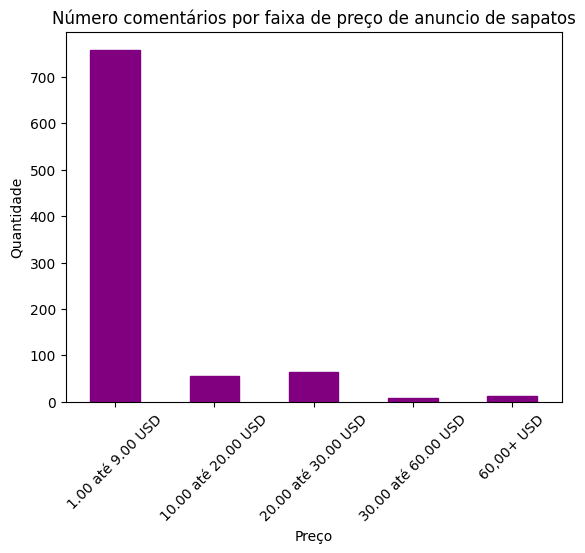

In [19]:
#Criamos a função de categorizar preços, que intera sobre cada valor da coluna
#em que for aplicada e aplica condicionais que retornarão informações que
#categorizam os preços em faixas. Usamos o range, ao invés de operadores de
#grandeza para manter o código limpo e conciso.

def categorizar_preco(valor):
    if valor > 59:
        return "60,00+ USD"
    if valor in range(29,58):
        return "30.00 até 60.00 USD"
    if valor in range(19,28):
        return "20.00 até 30.00 USD"
    if valor in range(9,18):
        return "10.00 até 20.00 USD"
    else:
        return "1.00 até 9.00 USD"


#Aplicamos função supracitada na variável 'preco'
preco = df["preço marcado"].apply(categorizar_preco)
#e fazemos contagem de valores, ordenando-os, na variável 'preco_contagem'
preco_contagem = preco.value_counts().sort_index()

#criação do gráfico
preco_contagem.plot(kind='bar', edgecolor='purple', color='purple')

#configurações
plt.xticks(rotation=45) #ângulo dos ticks para faixa de preço em 45º para
#melhor visualização
plt.xlabel("Preço")
plt.ylabel("Quantidade")
plt.title("Número comentários por faixa de preço de anuncio de sapatos")
plt.show()

Text(0.5, 1.0, 'Classificação por Faixa de Preço dos Sapatos')

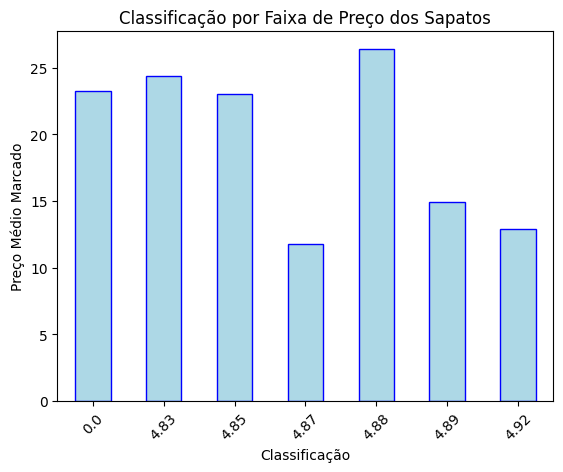

In [20]:
#contagem das classificações e preço marcado guaraddos como média nesta variável
preco_classificacao = df.groupby("classificação")["preço marcado"].mean()

#criação do gráfico
preco_classificacao.plot(kind='bar', edgecolor='blue', color='lightblue')

#configurações
plt.xticks(rotation=45)
plt.xlabel("Classificação")
plt.ylabel("Preço Médio Marcado")
plt.title("Classificação por Faixa de Preço dos Sapatos")


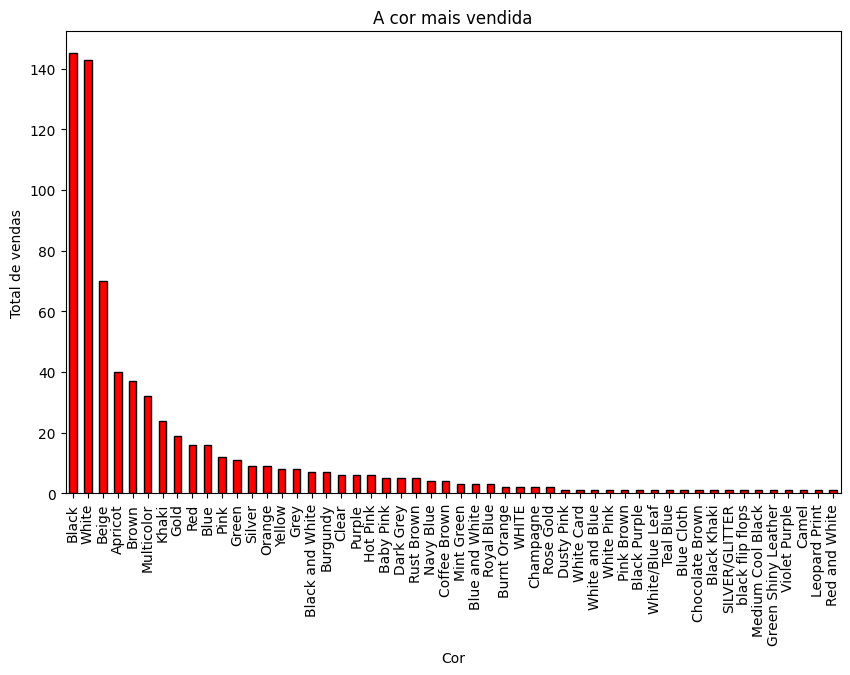

In [21]:
#Gráfico que mostra as cores mais vendidas.
color_sales = df["cor"].value_counts()

plt.figure(figsize=(10, 6))

# criação do gráfico
color_sales.plot(kind='bar', edgecolor='black', color='red')

# Configuração
plt.xticks(rotation=90) #Aqui escolhemos 90º graus para melhor visualização
plt.xlabel("Cor")
plt.ylabel("Total de vendas")
plt.title("A cor mais vendida")

plt.show()

In [22]:
#Teste de hipótese: nossa hipótese nula(h0) é se as pessoas comentam mais em sapatos com preços mais baratos ou se a hipotese alternativa (h1)
#é se as pessoas não comentam mais em sapatos com preços mais baratos.

#Teste de hipótese
preco = df["preço marcado"].dropna()
comentarios = df["numero de comentários"].apply(pd.to_numeric, errors='coerce').dropna()

#Teste t
estatistica_t, valor_p = ttest_ind(preco, comentarios)
print("Estatística t:", estatistica_t)
print("Valor p:", valor_p)

Estatística t: 0.8126872798120526
Valor p: 0.4165477947863525


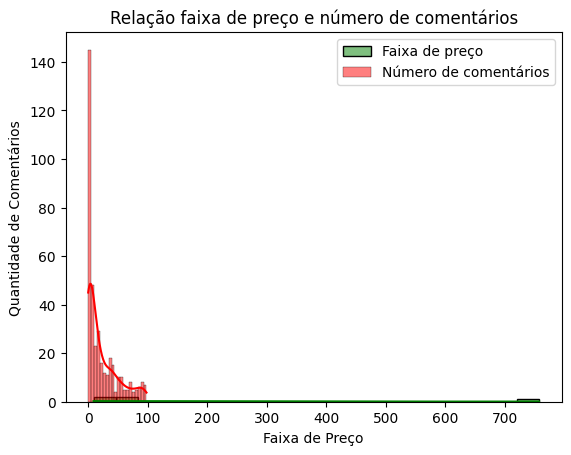

Não Rejeitamos a hipótese nula


In [23]:
#Gráfico
faixa_de_preco = df["preço marcado"].apply(categorizar_preco)
faixa_de_preco = faixa_de_preco.value_counts().sort_index()
sns.histplot(faixa_de_preco, color= 'green', label='Faixa de preço', kde=True, bins=20)
sns.histplot(comentarios, color= 'red', label='Número de comentários', kde=True, bins=20)

#Rótulos
plt.legend()
plt.title('Relação faixa de preço e número de comentários')
plt.xlabel('Faixa de Preço')
plt.ylabel('Quantidade de Comentários')
plt.show()

#Intrepretação
if valor_p < 0.05:
    print('Rejeitamos a hipótese nula')
else:
    print('Não Rejeitamos a hipótese nula')


In [24]:
amostra_df = df.sample(100)

In [25]:
amostra_df.head(3)

,nome do anuncio,link do produto,preço em usd,preço marcado,classificação,cor,numero de comentários,Ididentificador de sku,link da imagem
694,"Women's Green High Heel Sandals, Square Toe Ch...",https://us.shein.com/Women-s-Green-High-Heel-S...,19.30,24.3,0.0,Green,1000+,sx2302210808033602,//img.ltwebstatic.com/images3_pi/2023/07/24/16...
823,"Women Fringe Trim Ankle Strap Wedge Sandals, F...",https://us.shein.com/Women-Fringe-Trim-Ankle-S...,12.66,18.0,0.0,Multicolor,100+,sx2304117677465555,//img.ltwebstatic.com/images3_pi/2024/04/06/d2...
322,Vintage Rivet Wedge Heeled Fashion Peep-Toe Sa...,https://us.shein.com/Vintage-Rivet-Wedge-Heele...,15.20,19.1,0.0,Black,16,sx2403111304239713,//img.ltwebstatic.com/images3_spmp/2024/04/11/...


In [26]:
#Saber a cor de sapato com a melhor classificação

conn = sqlite3.connect(':memory:')

amostra_df.to_sql('amostra_df', conn, index=False, if_exists='replace')

query_sql = """
SELECT cor, COUNT() AS contagem
FROM amostra_df
GROUP BY classificação = 5.0
"""

resultado_sql = pd.read_sql_query(query_sql, conn)

print(resultado_sql)
conn.close()

     cor  contagem
0  Green       100
